In [1]:
# Dependencies
from citipy import citipy
from random import uniform
import json
import requests
from pprint import pprint
from config import api_key
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date 
from scipy.stats import linregress

In [2]:
# Retrive 1000 citites objects from citipy
cities = []

while len(cities) <1000:
    latitude = uniform(90, -90)
    longitude = uniform(180, -180)
    new_city = citipy.nearest_city(latitude, longitude)
    if new_city not in cities:
        cities.append(new_city)    

In [3]:
# Building query and retreiving API query
city_info=[]
city_num = 0
request_date = date.today()
for city in cities:
    city_num+=1
    base_url = "http://api.openweathermap.org/data/2.5/weather?q="
    query_url = (f"{base_url}{city.city_name},{city.country_code}&units=imperial&appid={api_key}")
    weather_response= requests.get(query_url)
    city_info.append(weather_response.json())
    print(f"City count: {city_num}\n Retrieving data for {city.city_name} in {city.country_code}.")

City count: 1
 Retrieving data for hervey bay in au.
City count: 2
 Retrieving data for tiksi in ru.
City count: 3
 Retrieving data for udachnyy in ru.
City count: 4
 Retrieving data for belaya gora in ru.
City count: 5
 Retrieving data for bengkulu in id.
City count: 6
 Retrieving data for punta arenas in cl.
City count: 7
 Retrieving data for iracoubo in gf.
City count: 8
 Retrieving data for ukiah in us.
City count: 9
 Retrieving data for east london in za.
City count: 10
 Retrieving data for atuona in pf.
City count: 11
 Retrieving data for verkhnyaya inta in ru.
City count: 12
 Retrieving data for chokurdakh in ru.
City count: 13
 Retrieving data for sao miguel do araguaia in br.
City count: 14
 Retrieving data for rikitea in pf.
City count: 15
 Retrieving data for davila in ph.
City count: 16
 Retrieving data for mataura in pf.
City count: 17
 Retrieving data for gallup in us.
City count: 18
 Retrieving data for jamestown in sh.
City count: 19
 Retrieving data for hithadhoo in mv

In [4]:
# Pretty Print response
pprint(city_info)

[{'base': 'stations',
  'clouds': {'all': 16},
  'cod': 200,
  'coord': {'lat': -25.2986, 'lon': 152.8535},
  'dt': 1616895845,
  'id': 2146219,
  'main': {'feels_like': 87.08,
           'humidity': 48,
           'pressure': 1016,
           'temp': 84.2,
           'temp_max': 84.2,
           'temp_min': 84.2},
  'name': 'Hervey Bay',
  'sys': {'country': 'AU',
          'id': 9501,
          'sunrise': 1616874927,
          'sunset': 1616917909,
          'type': 1},
  'timezone': 36000,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 150, 'speed': 2.3}},
 {'base': 'stations',
  'clouds': {'all': 99},
  'cod': 200,
  'coord': {'lat': 71.6872, 'lon': 128.8694},
  'dt': 1616895665,
  'id': 2015306,
  'main': {'feels_like': 1.29,
           'grnd_level': 1001,
           'humidity': 92,
           'pressure': 1006,
           'sea_level': 1006,
           't

In [5]:
# Function to get values from a dictionary
def safe_get(d, *keys):
    value = d
    for key in keys:
        value = value.get(key,None)
        if value is None: break
    return value

# Using list comprehension to retrieve desired data by iterating through dicts in city_info and using function "safe_get".
weather_city_info = [
    {
        "City": safe_get(city,"name"),
        "Country": safe_get(city,"sys","country"), 
        "Latitude": safe_get(city, "coord","lat"),
        "Longitude": safe_get(city, "coord","lon"),
        "Temperature (F)": safe_get(city, "main","temp"),
        "Humidity (%)": safe_get(city,"main", "humidity"),
        "Cloudiness (%)": safe_get(city, "clouds","all"),
        "Wind Speed (mph)": safe_get(city, "wind","speed")
    } for city in city_info
]
pprint(weather_city_info)


[{'City': 'Hervey Bay',
  'Cloudiness %': 16,
  'Country': 'AU',
  'Humidity %': 48,
  'Latitude': -25.2986,
  'Longitude': 152.8535,
  'Temperature (F)': 84.2,
  'Wind Speed (mph)': 2.3},
 {'City': 'Tiksi',
  'Cloudiness %': 99,
  'Country': 'RU',
  'Humidity %': 92,
  'Latitude': 71.6872,
  'Longitude': 128.8694,
  'Temperature (F)': 8.65,
  'Wind Speed (mph)': 2.46},
 {'City': 'Udachny',
  'Cloudiness %': 96,
  'Country': 'RU',
  'Humidity %': 92,
  'Latitude': 66.4167,
  'Longitude': 112.4,
  'Temperature (F)': 10.51,
  'Wind Speed (mph)': 3.98},
 {'City': 'Belaya Gora',
  'Cloudiness %': 34,
  'Country': 'RU',
  'Humidity %': 82,
  'Latitude': 68.5333,
  'Longitude': 146.4167,
  'Temperature (F)': 6.19,
  'Wind Speed (mph)': 4.21},
 {'City': 'Bengkulu',
  'Cloudiness %': 100,
  'Country': 'ID',
  'Humidity %': 83,
  'Latitude': -3.8004,
  'Longitude': 102.2655,
  'Temperature (F)': 76.82,
  'Wind Speed (mph)': 6.62},
 {'City': 'Punta Arenas',
  'Cloudiness %': 0,
  'Country': 'CL'

In [17]:
# Transform data into a data frame
weather_city_info_df = pd.DataFrame(weather_city_info)
weather_city_info_df

City Country  Latitude  Longitude  Temperature (F)  Humidity %  \
0     Hervey Bay      AU  -25.2986   152.8535            84.20        48.0   
1          Tiksi      RU   71.6872   128.8694             8.65        92.0   
2        Udachny      RU   66.4167   112.4000            10.51        92.0   
3    Belaya Gora      RU   68.5333   146.4167             6.19        82.0   
4       Bengkulu      ID   -3.8004   102.2655            76.82        83.0   
..           ...     ...       ...        ...              ...         ...   
995        Sadon      RU   42.8518    44.0037            41.00        70.0   
996       Owando      CG   -0.4819    15.8999            71.53        88.0   
997  Pundaguitan      PH    6.3711   126.1689            81.39        77.0   
998      Mīrābād      AF   30.4362    61.8383            79.38        17.0   
999      Dudinka      RU   69.4058    86.1778            -2.92        98.0   

     Cloudiness %  Wind Speed (mph)  
0            16.0              2.30  
1            99.0              2.46  
2            96.0              3.98  
3            34.0              4.21  
4           100.0              6.62  
..            ...               ...  
995          55.0              4.47  
996          57.0              1.12  
997          87.0              5.14  
998           2.0             10.29  
999          42.0              6.89  

[1000 rows x 8 columns]

In [20]:
# Find count of empty dictionaries
print(f'There are {len([entry for entry in weather_city_info if entry["City"] is None])} cities without information.')

There are 101 cities without information.


In [21]:
# Drop rows without city information with dropna()
clean_weather_city_info_df= weather_city_info_df.dropna()
# Count number of cities with information
total_cities = len(clean_weather_city_info_df.index)
print(f" There is weather data for {total_cities} cities.")

 There is weather data for 899 cities.


In [22]:
# Display the cleaned up data
clean_weather_city_info_df.head()

City Country  Latitude  Longitude  Temperature (F)  Humidity %  \
0   Hervey Bay      AU  -25.2986   152.8535            84.20        48.0   
1        Tiksi      RU   71.6872   128.8694             8.65        92.0   
2      Udachny      RU   66.4167   112.4000            10.51        92.0   
3  Belaya Gora      RU   68.5333   146.4167             6.19        82.0   
4     Bengkulu      ID   -3.8004   102.2655            76.82        83.0   

   Cloudiness %  Wind Speed (mph)  
0          16.0              2.30  
1          99.0              2.46  
2          96.0              3.98  
3          34.0              4.21  
4         100.0              6.62

In [10]:
# Write data frame data into csv
clean_weather_city_info_df.to_csv('Outputs/weather_data.csv', index= False, header= True)


In [11]:
# Copy data frame for integrity
data_df = clean_weather_city_info_df.copy()


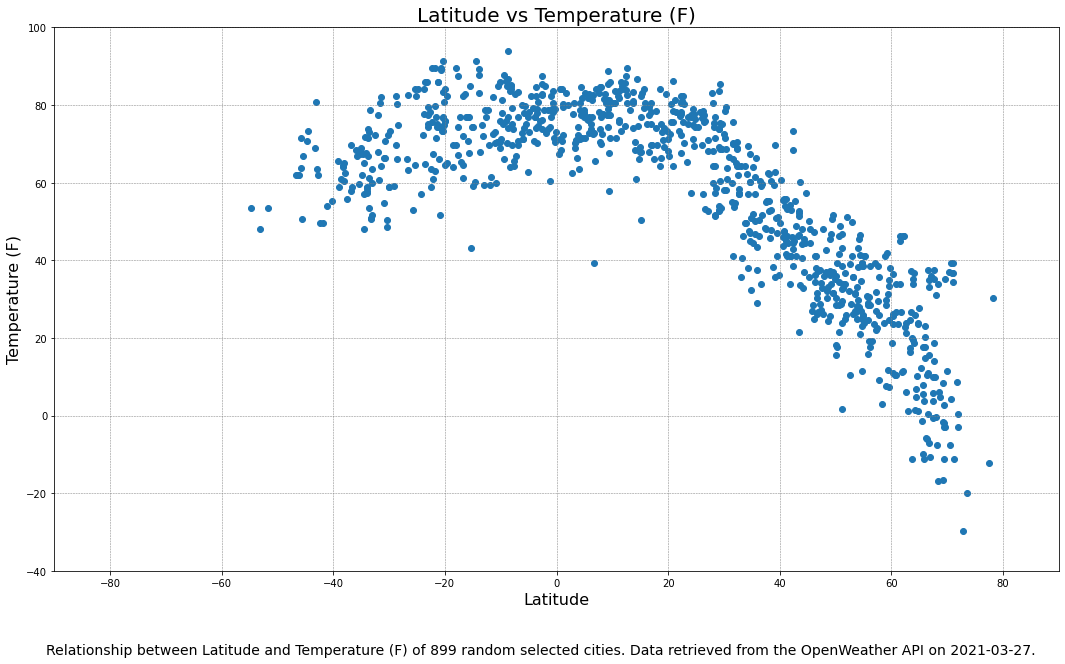

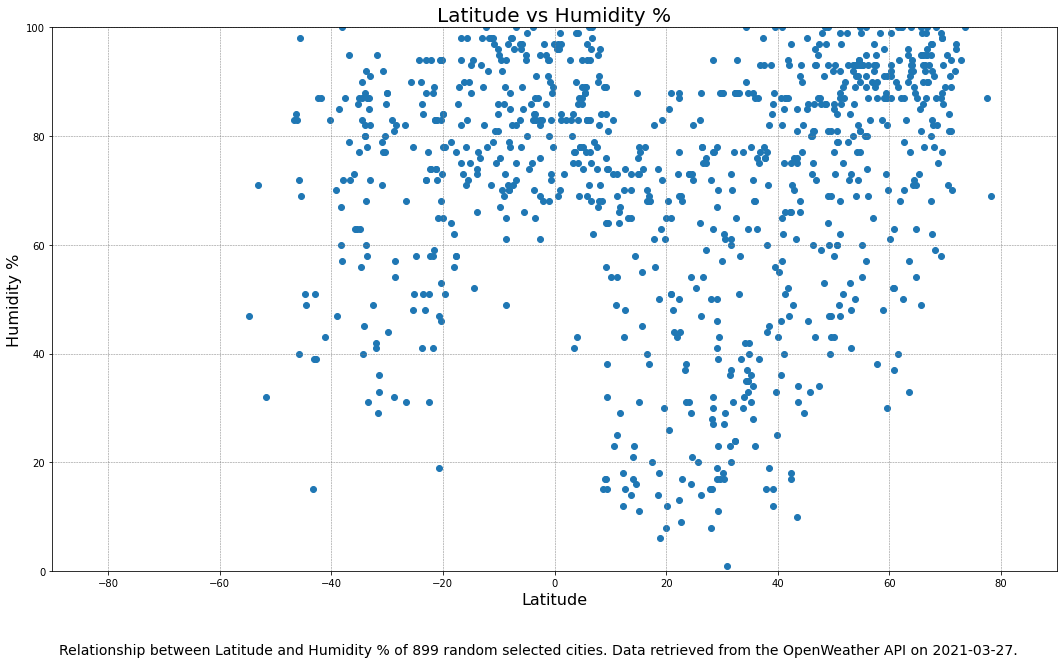

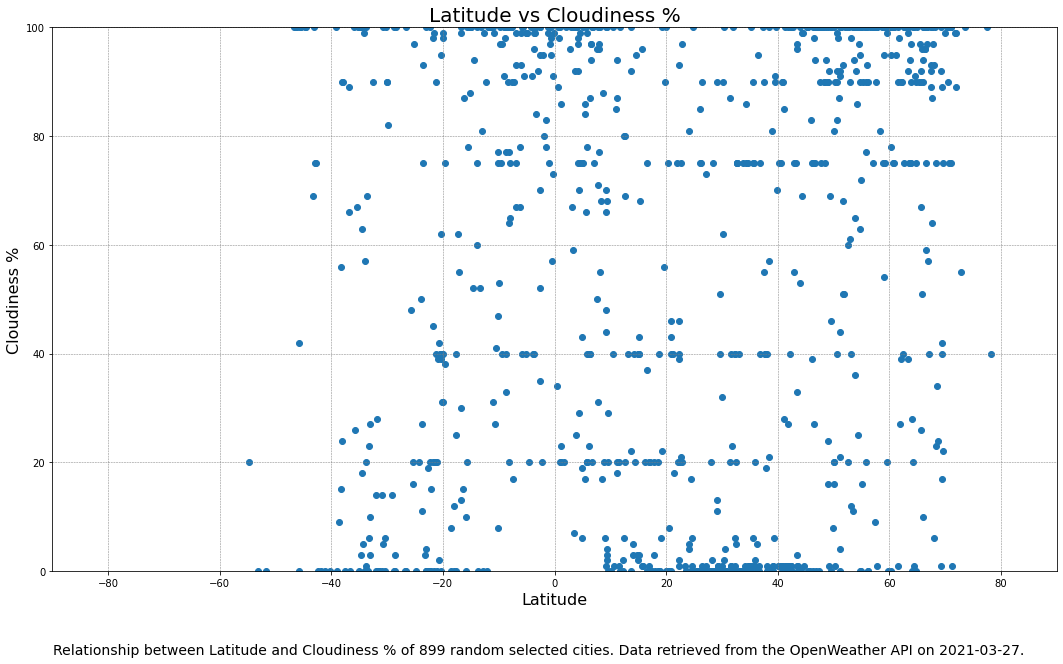

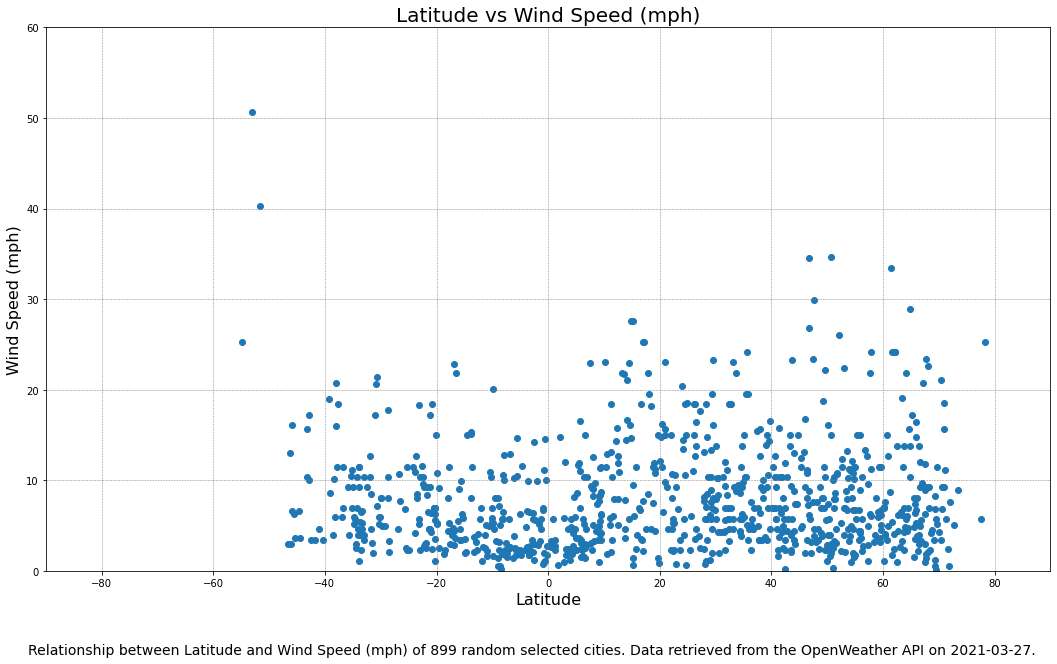

In [23]:
# Iterate through list of colummns to make scatter plots:
column_names=["Temperature (F)", "Humidity %", "Cloudiness %", "Wind Speed (mph)"]
# For each column generate scatter plot
for type in column_names:
    # Set figure size
    plt.figure(figsize= (18,10))
    # Make scatter plot
    plt.scatter(data_df["Latitude"], data_df[type])
    # Set limits for x-axis
    plt.xlim([-90, 90])
    # Set limits for the y-axis based on the column type
        # For tempererature calculate the min and max based on the data collected and add 10 degrees to the axis range
    if type == "Temperature (F)":
        plt.ylim(round(min(data_df[type]),-1)-10,round(max(data_df[type]),-1)+10)
        # For wind speed calculate the max y limit based on the data collected and add 10 mph
    elif type == "Wind Speed (mph)":
        plt.ylim(0,round(max(data_df[type]),-1)+10)
        # For humity and cloudiness set limits from 0 to 100 since the data reflect percent
    else:
        plt.ylim([0,100])
    # Set title
    plt.title(f"Latitude vs {type}", fontsize=20)
    # Set x-axis label
    plt.xlabel("Latitude", fontsize=16)
    # Set y-axis label
    plt.ylabel(type, fontsize=16)
    # Add grid to plot
    plt.grid(color= "gray", linestyle="--", linewidth= 0.5)
    # Set text to be added with plt.figtext
    txt= (f"Relationship between Latitude and {type} of {total_cities} random selected cities. Data retrieved from the OpenWeather API on {request_date}.")
    plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)
    # Save figure
    plt.savefig(f"Outputs/{type}_scatter.png", dpi=600, transparent=False)
    # Display plot
    plt.show()
    

In [13]:
# Split data into two data frames by hemisphere (northern and southern) and reset the index
northern_data_df= data_df.loc[data_df["Latitude"]>0].reset_index(drop= True)
southern_data_df= data_df.loc[data_df["Latitude"]<0].reset_index(drop= True)
# Print new data frames and city counts
print(northern_data_df.head())
print(f"Norther city count: {len(northern_data_df.index)}")
print(southern_data_df.head())
print(f"Southern city count: {len(southern_data_df.index)}")

          City Country  Latitude  Longitude  Temperature (F)  Humidity %  \
0        Tiksi      RU   71.6872   128.8694             8.65        92.0   
1      Udachny      RU   66.4167   112.4000            10.51        92.0   
2  Belaya Gora      RU   68.5333   146.4167             6.19        82.0   
3     Iracoubo      GF    5.4802   -53.2011            76.55        88.0   
4        Ukiah      US   39.1502  -123.2078            69.67        15.0   

   Cloudiness %  Wind Speed (mph)  
0          99.0              2.46  
1          96.0              3.98  
2          34.0              4.21  
3          86.0             11.88  
4           1.0              9.22  
629
           City Country  Latitude  Longitude  Temperature (F)  Humidity %  \
0    Hervey Bay      AU  -25.2986   152.8535            84.20        48.0   
1      Bengkulu      ID   -3.8004   102.2655            76.82        83.0   
2  Punta Arenas      CL  -53.1500   -70.9167            48.09        71.0   
3   East London

In [14]:
# Regression plots per hemisphere
# make function to craete the regression plots
def regress (df, col_list, hemisphere):
    #Use linregress to calculate the line equation and r-value
    for type in col_list:
        (slope, intercept, rvalue, pvalue, stderr)= linregress(df["Latitude"],df[type])
        regress_values= df["Latitude"] * slope + intercept
        line_equation = (f"y= {str(round(slope,2))}x + {str(round(intercept,2))}")
        # Set fig, ax to encompass plot
        fig, ax= plt.subplots(figsize=(20, 10))
        # Make scatter plot
        ax.scatter(df["Latitude"], df[type])
        # Set x-axis label
        ax.set_xlabel("Latitude")
        # Set y-axis label
        ax.set_ylabel(type)
        # Set the x-axis limits based on hemisphere
            # For nothern hemisphere set limits from 0 to 90 - data retrived for cities from latitudes from 0 up to 80 latitude
        if hemisphere == "Northern":
            ax.set_xlim([0, 90])
       # Calculate the min x-axis limit based on the min latitude of data retreived, and add 10 degree latitude buffer
        elif hemisphere == "Southern":
            ax.set_xlim([round(min(df["Latitude"]),-1)-10, 0])
        # Raise ValueError if hemisphere is mispelled
        else:
            raise ValueError("hemisphere must be Northern or Southern")
        # Set the y-axis limits based on the type of data plotted
            # For temperature calcualte the min and max limits based on data retrieved with a 10 degree buffer
        if type == "Temperature (F)":
            ax.set_ylim(round(min(df[type]),-1)-10,round(max(df[type]),-1)+10)
            # For wind speed calculate the max y-axis limit and add 10 mph buffer
        elif type == "Wind Speed (mph)":
            ax.set_ylim(0,round(max(df[type]),-1)+10)
            # For humidity and cloudiness set limits to 0 and 100 since data is based on percent
        else:
            ax.set_ylim([0,100])
        # Set title of plot
        ax.set_title(f"{hemisphere} Hemisphere: Latitude vs {type}", fontsize=28)
        # Set x-axis label
        ax.set_xlabel("Latitude", fontsize=20)
        # Set y-axis label
        ax.set_ylabel(type, fontsize=20)
        # Add a grid to the plot and style
        ax.grid()
        plt.grid(color= "gray", linestyle="--", linewidth= 0.5)        
        # Add regression line to the scatter plot
        ax.plot(df["Latitude"], regress_values, "r-")
        # Display the line equation and r-squared on plot, location is based on hemisphere, the text is styled
        if hemisphere == "Northern":
            ax.text(0.925,0.925, (f"{line_equation} \n r-squared= {round(rvalue**2,2)}    "), horizontalalignment='center',verticalalignment='center', transform = ax.transAxes,  fontsize=14, fontweight='bold')
        if hemisphere == "Southern":
            ax.text(0.08,0.925, (f"{line_equation} \n r-squared= {round(rvalue**2,2)}    "), horizontalalignment='center',verticalalignment='center', transform = ax.transAxes,  fontsize=14, fontweight='bold')
        # Set texts to be displayed in the figtext - (2 added)
        txt_1= (f"Correlation between Latitude and {type} of {len(df.index)} random selected cities in the {hemisphere} hemisphere.\n Data retrieved from the OpenWeather API on {request_date}.")
        txt_2= ("The r-squared value is always between 0 and 1 inclusive. \n Perfect positive linear association: r-squared=1.00 | Large positive linear association: r-squared= 0.9 | Small positive linear association: r-squared= 0.45 | No association: r-squared= 0.0" )
        plt.figtext(0.5, 0.01, txt_1, wrap=True, horizontalalignment='center', fontsize=16)
        plt.figtext(0.5, -0.05, txt_2, wrap=True, fontsize=12, va="bottom", ha="center")
        # Save the figure
        plt.savefig(f"Outputs/{hemisphere}_{type}_regression.png", dpi=600, transparent=False)
        # Display the figure
        plt.show()


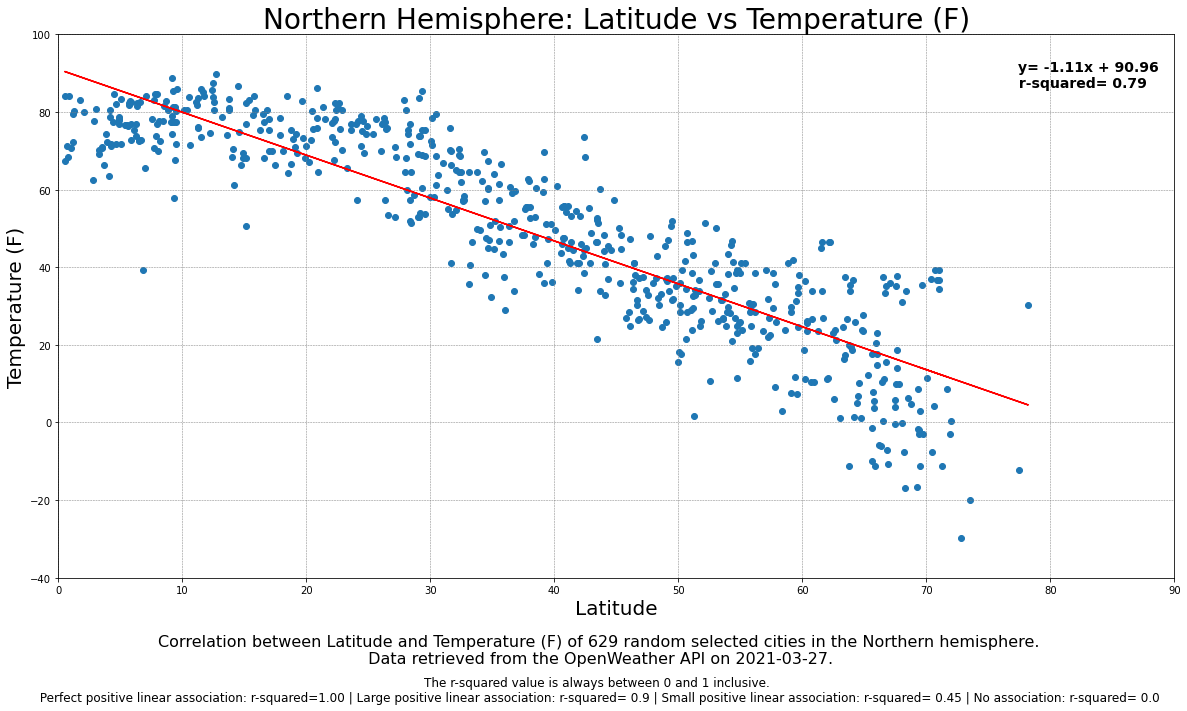

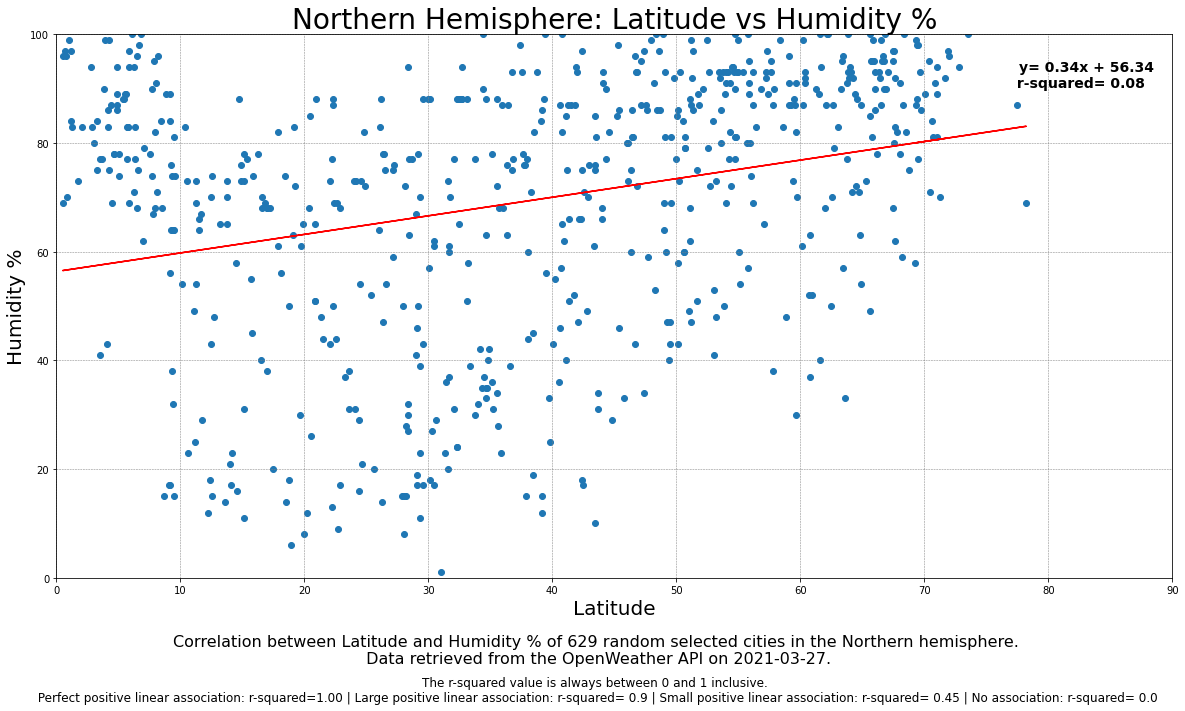

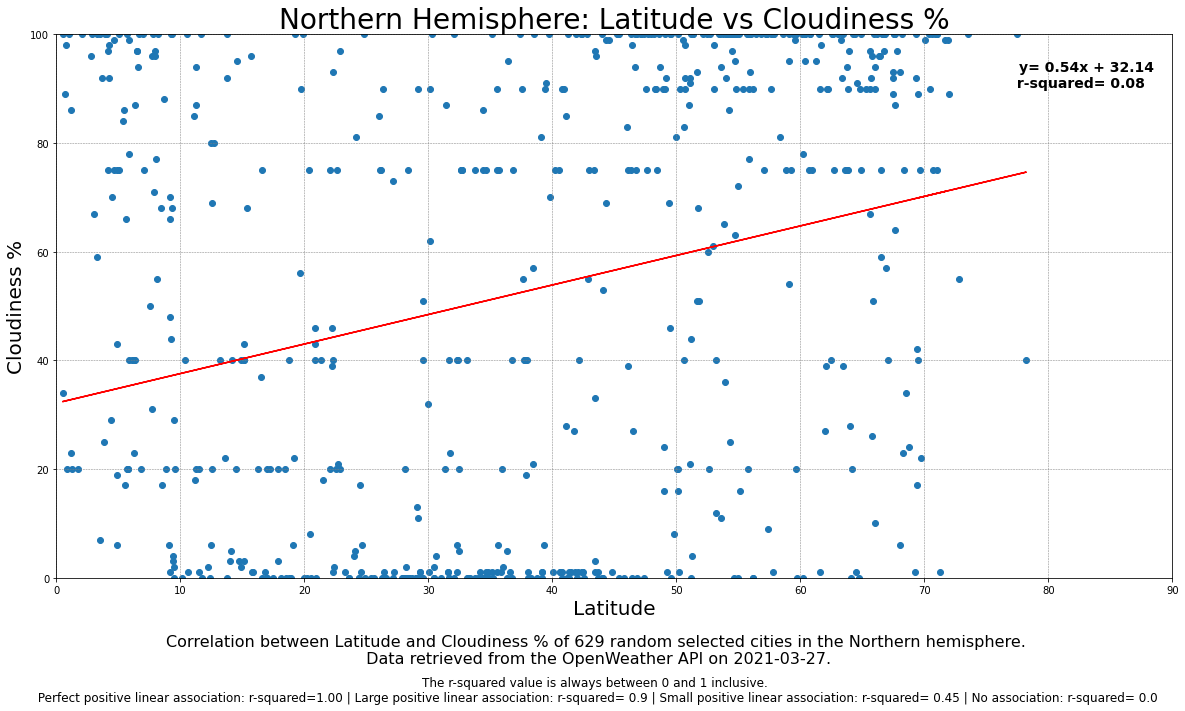

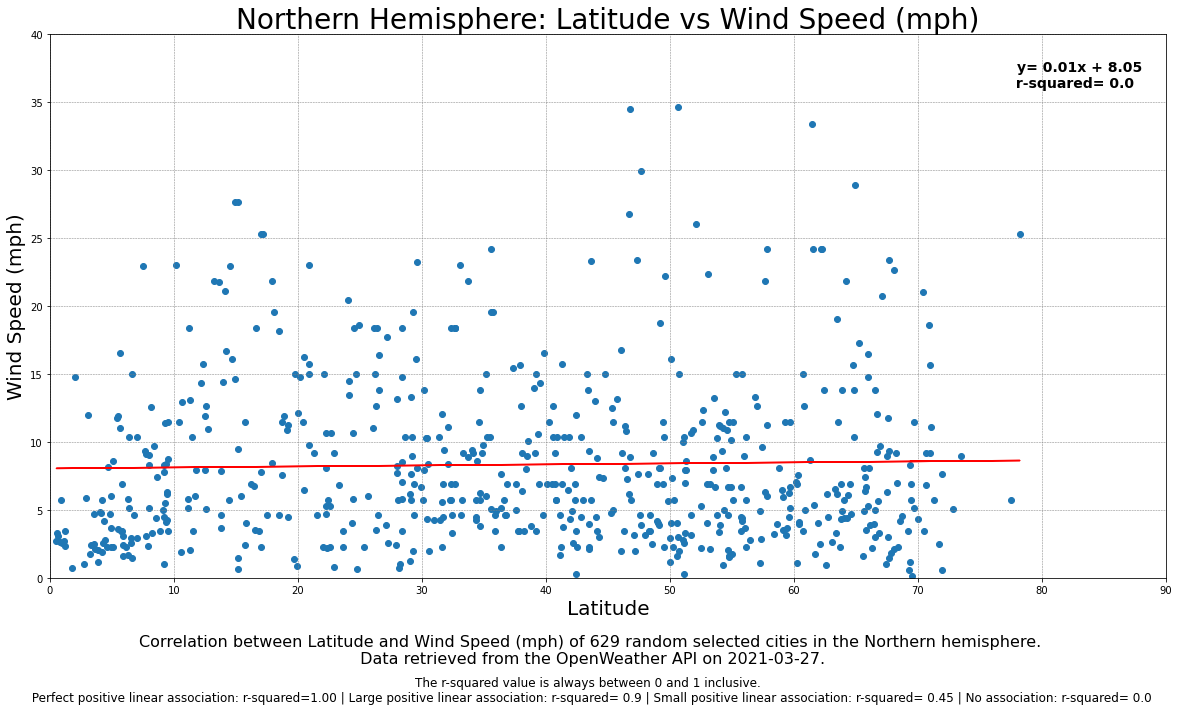

In [15]:
# Run fucgtion regress to create northern regression plots
regress(northern_data_df, column_names, "Northern")

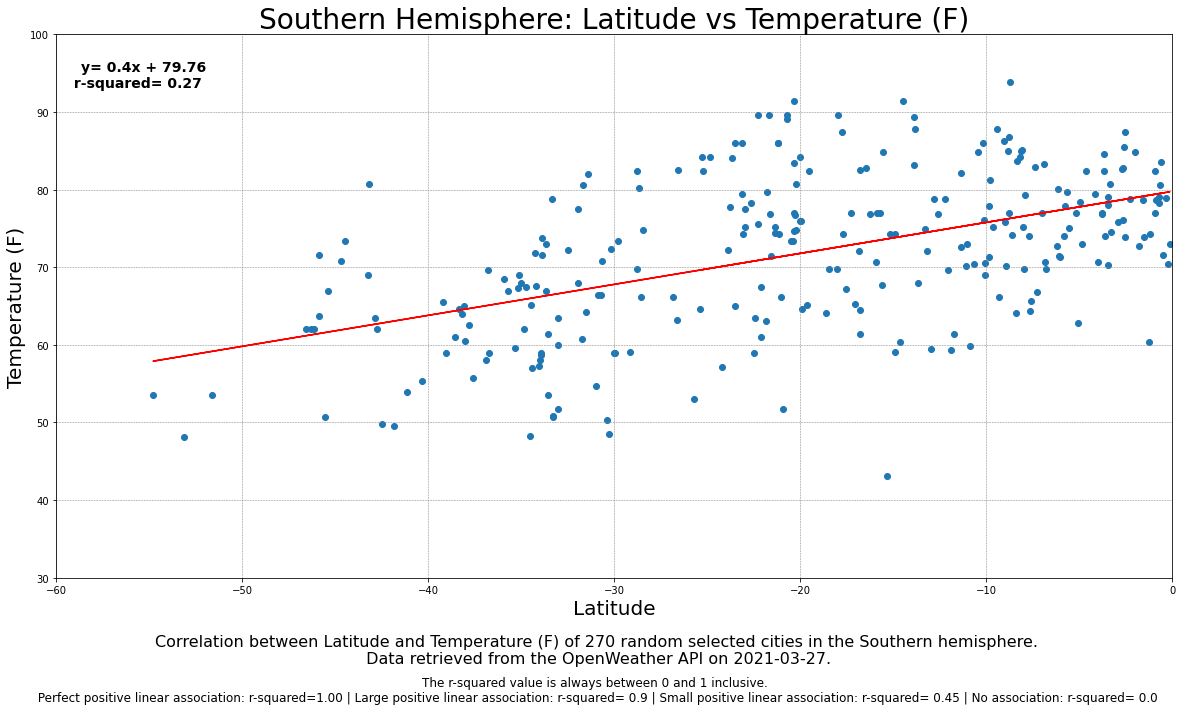

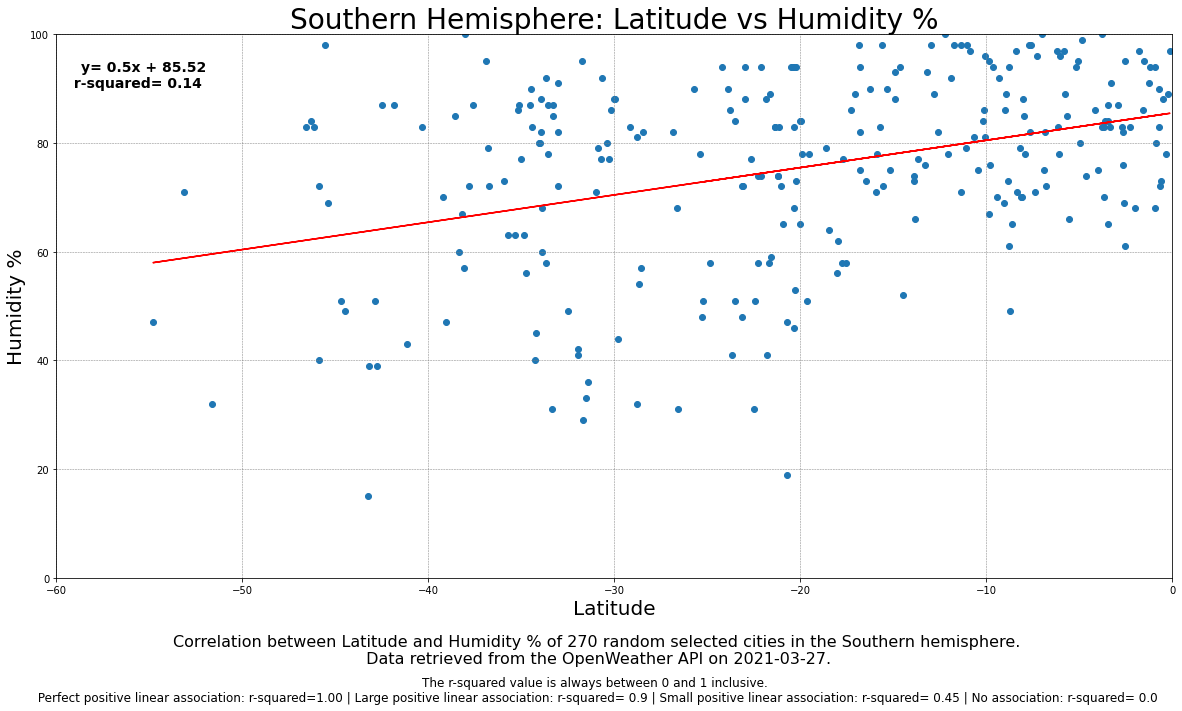

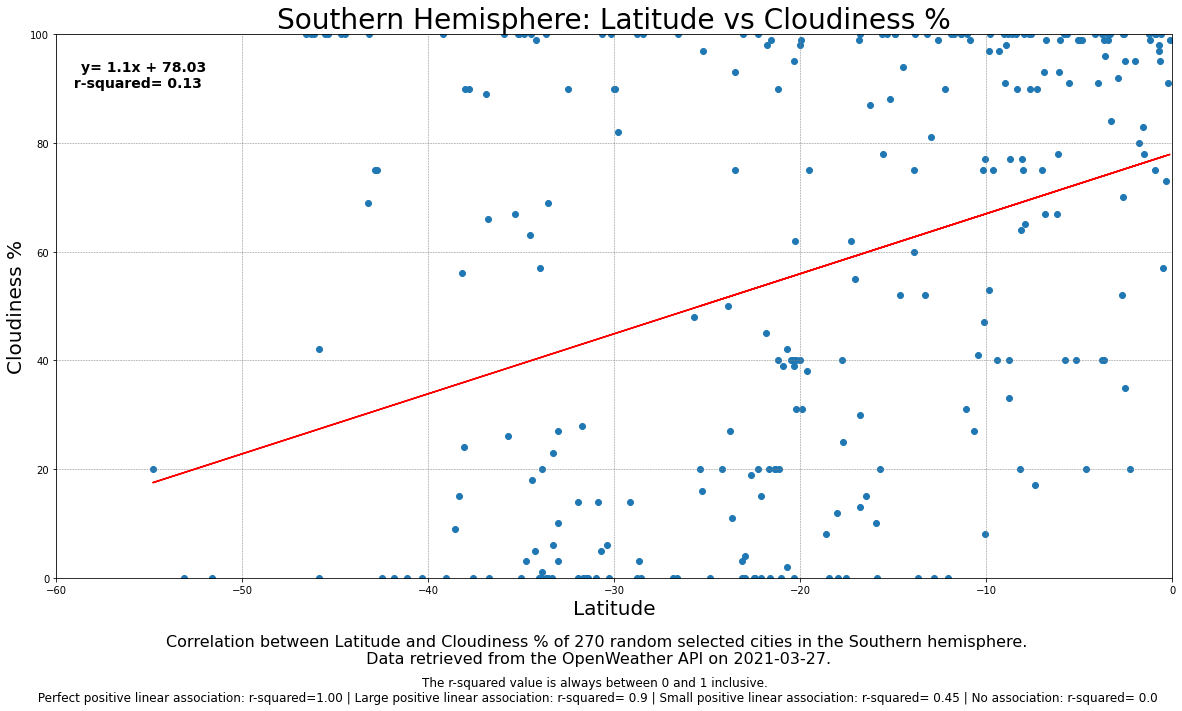

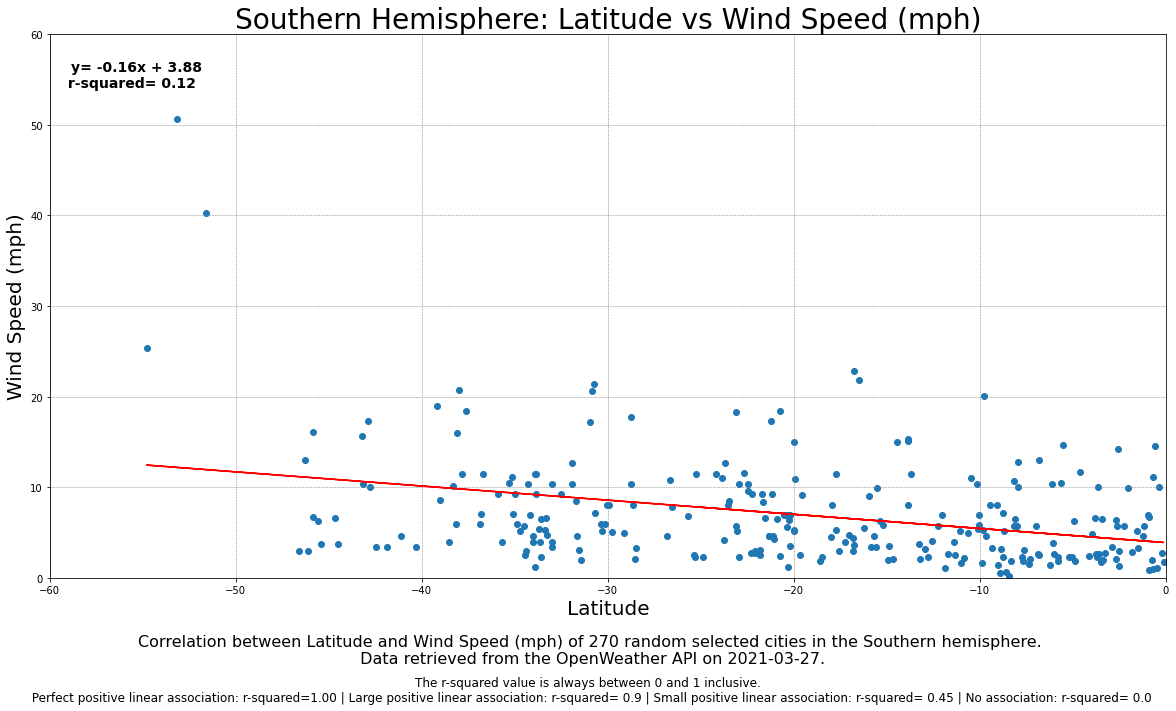

In [16]:
# Run regress function to create southern regression plots
regress(southern_data_df, column_names, "Southern")

In [ ]:
# Smile